In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor

In [2]:
n_neighbors_values = [1, 3, 6]

X_train = np.array([
    [1, 7],
    [2, 5],
    [2, 6],
    [3, 3],
    [3, 2],
    [3, 1],
    [4, 2],
    [5, 4],
    [5, 6]
])

y_train = np.array([15, 21, 32, 32, 25, 1, 14, 18, 12])

X_test = np.array([
    [3, 3],
    [3, 6],
    [5, 3]
])

y_test = np.zeros((0, 3))

In [3]:
reg = KNeighborsRegressor()

for n_neighbors in n_neighbors_values:
    reg.set_params(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    y_test = np.r_[y_test, [reg.predict(X_test)]]

In [4]:
y_test

array([[32.        , 32.        , 18.        ],
       [23.66666667, 21.66666667, 21.33333333],
       [18.5       , 21.66666667, 17.        ]])

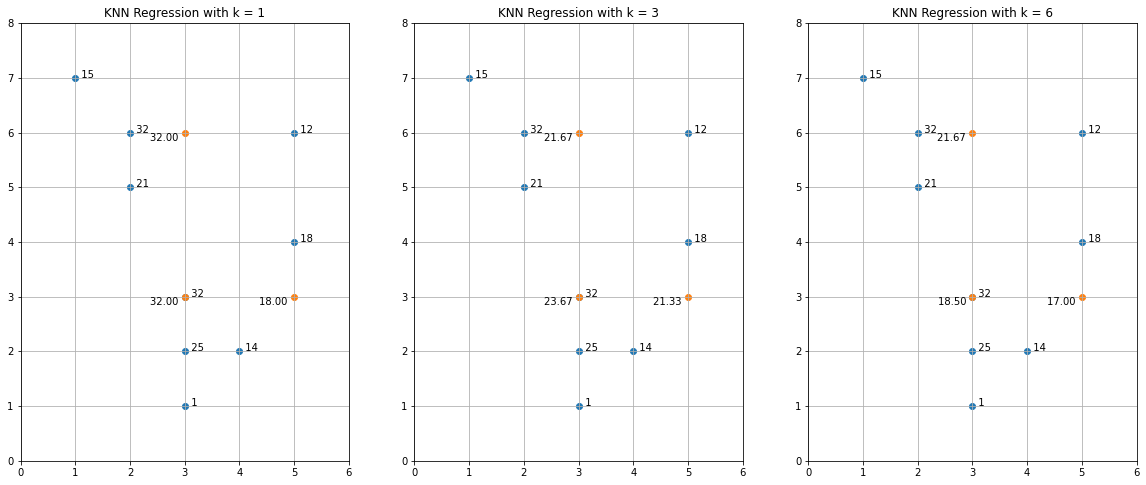

In [6]:
fig, axs = plt.subplots(1, len(n_neighbors_values), figsize=(20, 14))

for i, ax in enumerate(axs):
    ax.scatter(X_train[:, 0], X_train[:, 1])
    ax.scatter(X_test[:, 0], X_test[:, 1])
    
    ax.set_xlim(min(X_train[:, 0]) - 1, max(X_train[:, 0]) + 1)
    ax.set_ylim(min(X_train[:, 1]) - 1, max(X_train[:, 1]) + 1)
    
    ax.set_aspect('equal', adjustable='box')
    ax.grid()
    ax.set_title(f'KNN Regression with k = {n_neighbors_values[i]}')
    
    for (point, value) in zip(X_train, y_train):
        ax.annotate('  ' + str(value), (point[0], point[1]))
    
    for (point, predicted_value) in zip(X_test, y_test[i]):
        ax.annotate(f'{predicted_value:.2f}  ', (point[0], point[1]), horizontalalignment='right', verticalalignment='top')

plt.show()